## Observations and Insights

1. The organizer of this study did not include a control group.  This makes it impossible to tell how effective the treatments were compared to doing nothing.
2. The study is well balanced in that half the mice were male and half were female.
   * If we had been asked to find the number of mice in each drug group it would have been revealed there are ~25 mice in each group:
   `mouse_study.loc[mouse_study["Timepoint"]==0].groupby("Drug Regimen").count()`
3. There is a strong correlation between a mouse's weight and it's final tumor volume for the mice treated with Capomulin.
4. Ketapril had the largest average tumor size and is likely the least effective drug.
5. If we had been asked to calculate tumor growth rates, then we would have realized that only two treatments shrunk the tumor, and the rest facilitated the tumors to grow.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# print("Size of Dataset: " + str(len(mouse_study)) + " rows")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1



## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean = mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_volume_median = mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_volume_var = mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_volume_std = mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_volume_sem = mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_df = pd.DataFrame({
    "Mean": tumor_volume_mean,
    "Median": tumor_volume_mean,
    "Variance": tumor_volume_var,
    "SD": tumor_volume_std,
    "SEM": tumor_volume_sem
})

# an alternative method of calculating these values would be:
# mouse_study.groupby("Drug Regimen").agg(('mean', 'median', 'var', 'std', 'sem'))["Tumor Volume (mm3)"]

# print the values in a pretty table
summary_df.columns.name = summary_df.index.name
summary_df.index.name = None
summary_df

Drug Regimen,Mean,Median,Variance,SD,SEM
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.322552,52.322552,42.351070,6.507770,0.512884
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111
Zoniferol,53.236507,53.236507,48.533355,6.966589,0.516398


## Bar plots

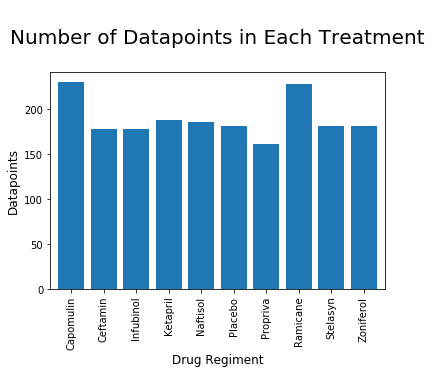

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
plot = mouse_study.groupby("Drug Regimen").count()["Tumor Volume (mm3)"] \
.plot(kind="bar", title="Number of Datapoints in Each Treatment", width=0.8)
plot.set_title("\nNumber of Datapoints in Each Treatment\n", fontdict={"size": 20})
plot.set_xlabel("Drug Regiment", fontdict={"size": 12})
plot.set_ylabel("Datapoints", fontdict={"size": 12})
plot.margins(0.05,0.05)
plt.show()

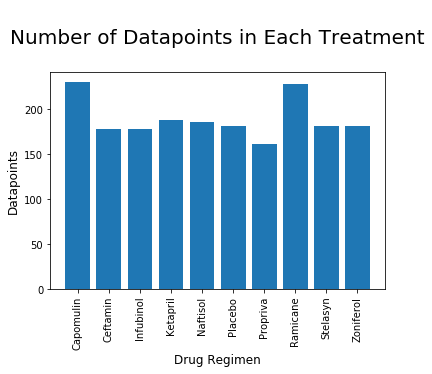

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
numDatapoints = mouse_study.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
plt.bar(numDatapoints.index.values, numDatapoints, width=0.8)
plt.title("\nNumber of Datapoints in Each Treatment\n", fontdict={"size": 20})
plt.xlabel("Drug Regimen", fontdict={"size": 12})
plt.ylabel("Datapoints", fontdict={"size": 12})
plt.xticks(rotation=90)
plt.margins(0.05,0.05)
plt.show()

## Pie plots

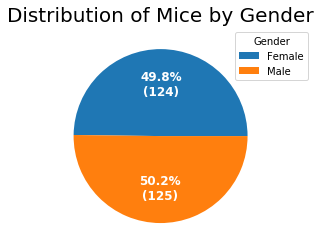

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderCount = mouse_study[["Sex", "Mouse ID"]].groupby(["Sex"])["Mouse ID"].nunique()
def label(x): return f"{x:.1f}%\n({x*genderCount.sum()/100:.0f})"

plot = genderCount.plot(kind="pie", label="", autopct=lambda x: label(x), \
       textprops={"color": "w", "size": 12, "weight": "bold"})

plot.set_title("Distribution of Mice by Gender", fontdict={"size": 20})
plot.legend(labels=genderCount.index, title="Gender", bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.show()

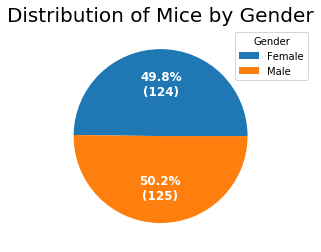

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genderCount, autopct=lambda x: label(x), textprops={"color": "w", "size": 12, "weight": "bold"})

plt.title("Distribution of Mice by Gender", fontdict={"size": 20})
plt.legend(labels=genderCount.index, title="Gender", bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Capomulin, Ramicane, Infubinol, and Ceftamin
finalTumorVolumes = mouse_study[mouse_study["Drug Regimen"].isin(("Capomulin", "Ramicane", "Infubinol", "Ceftamin"))]
finalTumorVolumes = finalTumorVolumes.loc[finalTumorVolumes.groupby(["Mouse ID"])["Timepoint"].idxmax()]
finalTumorVolumes.set_index("Mouse ID", inplace=True)
finalTumorVolumes.columns.name = finalTumorVolumes.index.name
finalTumorVolumes.index.name = None
finalTumorVolumes

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3
z578,Ramicane,Male,11,16,45,30.638696,0


In [8]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Q1, Q2, Q3, IQR, #Outliers
q1 = []
q2 = []
q3 = []
iqr = []
numOutliers = []

for drug in ("Overall", "Capomulin", "Ramicane", "Infubinol", "Ceftamin"):
    # select drug subgroup
    drugMice = finalTumorVolumes
    if drug != "Overall":
        drugMice = drugMice[drugMice["Drug Regimen"]==drug]
    # calculate quartiles and IQR
    drugQuartiles = drugMice[["Tumor Volume (mm3)"]].quantile([.25,.5,.75])["Tumor Volume (mm3)"]
    q1.append(drugQuartiles.iloc[0])
    q2.append(drugQuartiles.iloc[1])
    q3.append(drugQuartiles.iloc[2])
    iqr.append(drugQuartiles.iloc[2] - drugQuartiles.iloc[0])
    # calculate outliers
    drugQmin = drugQuartiles.iloc[0] - 1.5*iqr[-1]
    drugQmax = drugQuartiles.iloc[2] + 1.5*iqr[-1]
    drugOutliers = len(drugMice[drugMice["Tumor Volume (mm3)"]<drugQmin]) \
                 + len(drugMice[drugMice["Tumor Volume (mm3)"]>drugQmax])
    numOutliers.append(drugOutliers)

# convert calculations to a dataframe
distribution_df = pd.DataFrame({
    "Q1": pd.Series(q1).round(2),
    "Q2": pd.Series(q2).round(2),
    "Q3": pd.Series(q3).round(2),
    "IQR": pd.Series(iqr).round(2),
    "Outliers": pd.Series(numOutliers).round(2),
})
distribution_df.columns.name = "Tumor Volume"
distribution_df.index = ("Overall", "Capomulin", "Ramicane", "Infubinol", "Ceftamin")
distribution_df

Tumor Volume,Q1,Q2,Q3,IQR,Outliers
Overall,37.19,45.00,59.93,22.74,0
Capomulin,32.38,38.13,40.16,7.78,0
Ramicane,31.56,36.56,40.66,9.10,0
Infubinol,54.05,60.17,65.53,11.48,1
Ceftamin,48.72,59.85,64.30,15.58,0


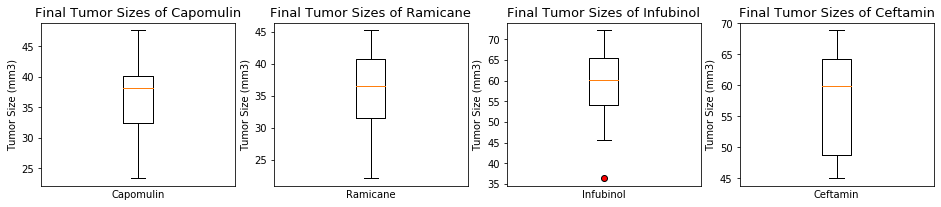

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plotData = []
drugs = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
for drug in ("Capomulin", "Ramicane", "Infubinol", "Ceftamin"):
    plotData.append(finalTumorVolumes[finalTumorVolumes["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
figure, plots = plt.subplots(1,len(plotData), figsize=(16, 3))
for index in range(len(plotData)):
    plots[index].boxplot(plotData[index], flierprops={"markerfacecolor": "r"})
    plots[index].set_title("Final Tumor Sizes of " + drugs[index], fontdict={"size": 13})
    plots[index].set_xlabel(drugs[index])
    plots[index].set_xticks([])
    plots[index].set_ylabel("Tumor Size (mm3)")
plt.show()

## Line and scatter plots

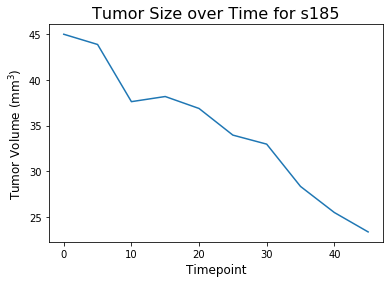

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# get first Capomulin mouse
mouse_id = mouse_study[mouse_study["Drug Regimen"]=="Capomulin"].iloc[0]["Mouse ID"]
mouse_data = mouse_study[mouse_study["Mouse ID"]==mouse_id]

# plot first Capomulin mouse's data
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("Tumor Size over Time for " + mouse_id, fontdict={"size": 16})
plt.xlabel("Timepoint", fontdict={"size": 12})
plt.ylabel("Tumor Volume (mm$^3$)", fontdict={"size": 12})
plt.show()

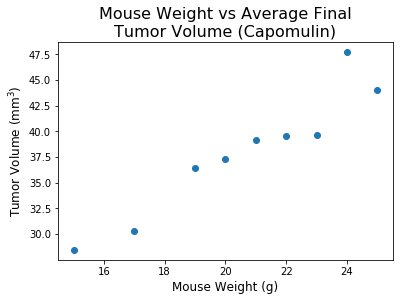

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# get 'mouse weights' and 'tumor volume averages' data Series
weight = pd.Series(finalTumorVolumes[finalTumorVolumes["Drug Regimen"]=="Capomulin"].groupby(["Weight (g)"]).count().index)
volume = finalTumorVolumes[finalTumorVolumes["Drug Regimen"]=="Capomulin"].groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"]

# plot average tumor volume by weight
plt.scatter(weight, volume)
plt.title("Mouse Weight vs Average Final\nTumor Volume (Capomulin)", fontdict={"size": 16})
plt.xlabel("Mouse Weight (g)", fontdict={"size": 12})
plt.ylabel("Tumor Volume (mm$^3$)", fontdict={"size": 12})
plt.show()

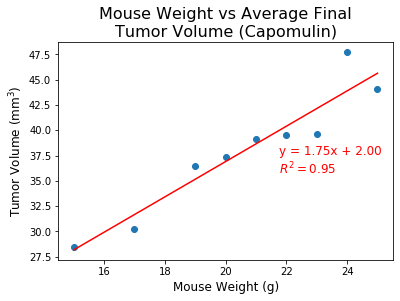

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
correlation = st.pearsonr(weight, volume)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\n$R^2 = {correlation[0]:.2f}$"

# repeat previous plot
plt.scatter(weight, volume)
plt.title("Mouse Weight vs Average Final\nTumor Volume (Capomulin)", fontdict={"size": 16})
plt.xlabel("Mouse Weight (g)", fontdict={"size": 12})
plt.ylabel("Tumor Volume (mm$^3$)", fontdict={"size": 12})

# calculate annotation position
position = (weight.mean() + (weight.max() - weight.mean())*0.25, volume.mean() - (volume.max() - volume.mean())*0.25)

# plot regression equation and r-squared
plt.plot(weight, weight*slope + intercept, "r-")
plt.annotate(line_eq,position,fontsize=12,color="red")
plt.show()

# Extra Data Just Because
* In the "Quartiles, outliers and boxplots" section, we were asked to "Calculate the final tumor volume of each mouse across four of the most promising treatment regimens."  In the README.md there treatments are stated to be "Capomulin, Ramicane, Infubinol, and Ceftamin."  However, I wanted to know by what margin are they the best drugs.

In [13]:
# let's calculate how how well the mice did

# create a list with all the mice
mice = mouse_study["Mouse ID"].unique()
results = []

# determine how well the mice did
for mouse in mice: # get the mouse's data
    mouse_data = mouse_study[mouse_study["Mouse ID"]==mouse]
    mouse_data = mouse_data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
    mouse_data.reset_index(inplace=True)
    # calculate the linear regression of the mouse's study results
    if len(mouse_data) < 2: continue # we need at least 2 values to calculate linregress
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
    # add the mouse to the results list
    results.append({
        "Mouse ID": mouse_data["Mouse ID"][0],
        "Drug Regimen": mouse_data["Drug Regimen"][0],
        "Tumor Growth Rate": slope
    })

# make a pretty DataFrame out of the results
results_df = pd.DataFrame(results)
results_df.set_index("Mouse ID", inplace=True)
results_df.columns.name = results_df.index.name
results_df.index.name = None
results_df.sort_values(by="Tumor Growth Rate")

# show best and worst mouse
pd.merge(results_df.iloc[0], results_df.iloc[-1], on="Mouse ID", how="outer").transpose()

Mouse ID,Drug Regimen,Tumor Growth Rate
k403,Ramicane,-0.435169
z969,Naftisol,0.639898


In [14]:
# Then, to determine the most promissing treatment regimens, calculated the mean of Tumor Growth Rates
top_drugs = results_df.groupby("Drug Regimen").mean().sort_values(by="Tumor Growth Rate")
top_drugs.columns.name = top_drugs.index.name
top_drugs.index.name = None

print("The Most Promising Treatment Regimens:")
top_drugs

The Most Promising Treatment Regimens:


Drug Regimen,Tumor Growth Rate
Capomulin,-0.227519
Ramicane,-0.205903
Infubinol,0.330636
Ceftamin,0.406351
Zoniferol,0.427391
Propriva,0.440547
Stelasyn,0.446190
Naftisol,0.483692
Placebo,0.507229
Ketapril,0.547060
